<a href="https://colab.research.google.com/github/Praveen-Web-Dev/Renewable-Dataset-Analysis/blob/main/Theme_3_4_4_4_%E2%80%93_Sectoral_Rebound_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned_dataset.csv to cleaned_dataset (1).csv


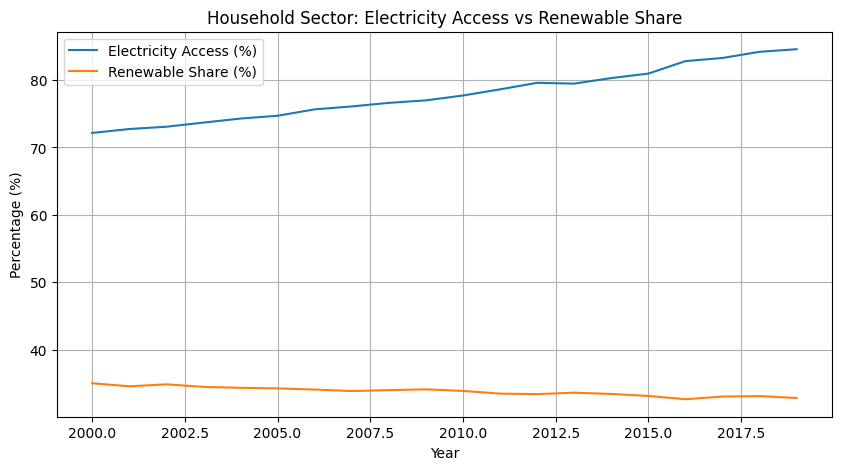

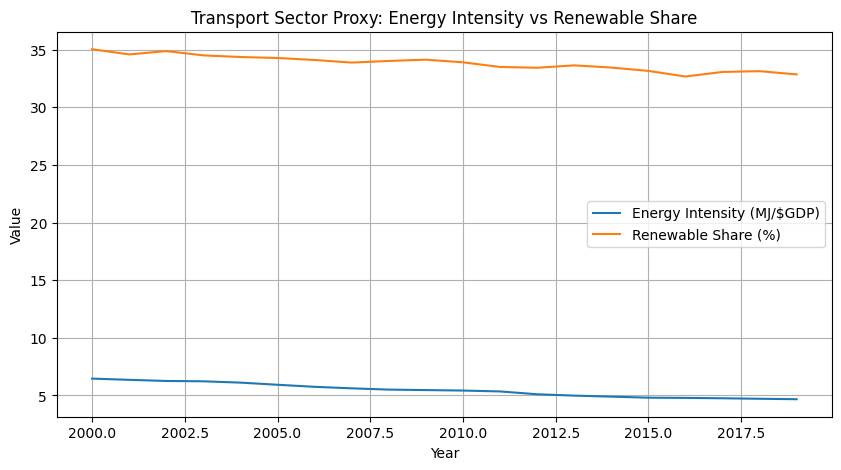

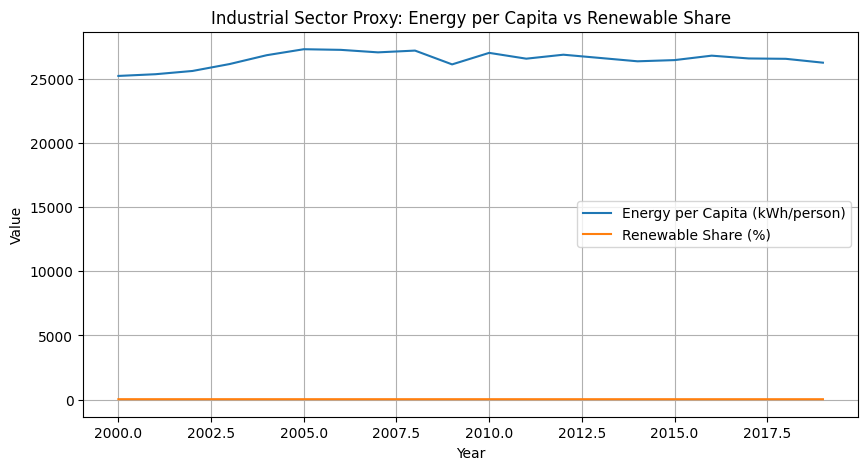


📊 Summary of Global Indicators in 2000 vs 2019:

Electricity Access (%): 72.16 → 84.57
Renewable Share (%): 35.04 → 32.85
Energy Intensity (MJ/$GDP): 6.46 → 4.67
Energy per Capita (kWh/person): 25228.71 → 26261.68


In [5]:
# ✅ 1. Upload the dataset
from google.colab import files
uploaded = files.upload()

# ✅ 2. Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 3. Load dataset
df = pd.read_csv('cleaned_dataset.csv')

# ✅ 4. Rename relevant columns for easier handling
df = df.rename(columns={
    'access_to_electricity_(%_of_population)': 'electricity_access',
    'renewable_energy_share_in_the_total_final_energy_consumption_(%)': 'renewable_share',
    'energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)': 'energy_intensity',
    'primary_energy_consumption_per_capita_(kwh/person)': 'energy_per_capita'
})

# ✅ 5. Filter relevant columns and drop missing values
df_sectoral = df[['year', 'electricity_access', 'renewable_share', 'energy_intensity', 'energy_per_capita']].dropna()

# ✅ 6. Remove year 2020 (missing/partial data)
df_sectoral = df_sectoral[df_sectoral['year'] != 2020]

# ✅ 7. Group by year to get global averages
df_grouped = df_sectoral.groupby('year').mean().reset_index()

# ✅ 8. Household Sector Plot (Electricity Access vs Renewable Share)
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['year'], df_grouped['electricity_access'], label='Electricity Access (%)')
plt.plot(df_grouped['year'], df_grouped['renewable_share'], label='Renewable Share (%)')
plt.title('Household Sector: Electricity Access vs Renewable Share')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

# ✅ 9. Transport Sector Proxy (Energy Intensity vs Renewable Share)
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['year'], df_grouped['energy_intensity'], label='Energy Intensity (MJ/$GDP)')
plt.plot(df_grouped['year'], df_grouped['renewable_share'], label='Renewable Share (%)')
plt.title('Transport Sector Proxy: Energy Intensity vs Renewable Share')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# ✅ 10. Industrial Sector Proxy (Energy per Capita vs Renewable Share)
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['year'], df_grouped['energy_per_capita'], label='Energy per Capita (kWh/person)')
plt.plot(df_grouped['year'], df_grouped['renewable_share'], label='Renewable Share (%)')
plt.title('Industrial Sector Proxy: Energy per Capita vs Renewable Share')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# ✅ 11. Extract values for 2000 and 2019 to use in Results section
start_year = df_grouped['year'].min()
end_year = df_grouped['year'].max()

start_vals = df_grouped[df_grouped['year'] == start_year]
end_vals = df_grouped[df_grouped['year'] == end_year]

print(f"\n📊 Summary of Global Indicators in {start_year} vs {end_year}:\n")
print(f"Electricity Access (%): {start_vals['electricity_access'].values[0]:.2f} → {end_vals['electricity_access'].values[0]:.2f}")
print(f"Renewable Share (%): {start_vals['renewable_share'].values[0]:.2f} → {end_vals['renewable_share'].values[0]:.2f}")
print(f"Energy Intensity (MJ/$GDP): {start_vals['energy_intensity'].values[0]:.2f} → {end_vals['energy_intensity'].values[0]:.2f}")
print(f"Energy per Capita (kWh/person): {start_vals['energy_per_capita'].values[0]:.2f} → {end_vals['energy_per_capita'].values[0]:.2f}")
